<a href="https://colab.research.google.com/github/fuadsaneen/AlgorithmsExplained/blob/main/AI_Test_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nuchange - AI Test 5**

**Level A**

Submitted by : Fuad Saneen PK

Email : fuadsaneenpk@gmail.com

Contents :

Training

1. Install dependencies

2. Load train dataset

3. Preprocessing Steps

4. Define feature set

5. Define Output feature

6. Split test train

7. Train on different models and choose the best

Testing

1. Load test dataset

2. Preprocessing Steps

3. Predict on test data

4. Merge result with test data

**INSTALL DEPENDENCIES AND IMPORT LIBRARIES**

In [ ]:
# Install dependencies and import libraries.

# Preprocessing libraries.
import pandas as pd
import numpy as np
!pip install category-encoders
import category_encoders as ce

# Model libraries.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Various measurements libraries.
from sklearn.metrics import mean_absolute_error
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# Visualization libraries.
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Model saving library.
import pickle

     |████████████████████████████████| 82 kB 508 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 106 kB 29.9 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


**LOAD TRAINING DATASET**

In [ ]:
# Load training dataset.
train_dataset = pd.read_csv("aml_train.csv").copy()

**PREPROCESSOR**

In [ ]:
# Preprocessor and feature engineering.
def train_preprocessor(train_dataset):

    # Drop rows with null values.
    train_dataset = train_dataset.dropna(axis = 0, how ='any')

    # Encode category coloumns with OneHotEncoding technique.
    category_coloumn = train_dataset["TransactionType"]
    category_encoded = pd.get_dummies(data = category_coloumn, drop_first = True)

    # Merge all features together.
    other_features = ["amount", "PrevBalanceSender", "CurrentBalanceSender", "PrevBalanceReceiver", "CurrentBalanceReceiver", "IsSuspicious"]
    train_dataset = category_encoded.join(train_dataset[other_features])
    
    return train_dataset

train_dataset = train_preprocessor(train_dataset)
train_dataset.head()

,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver,IsSuspicious
0,0,0,0,1,152372.18,152372.18,0.00,0.00,0.00,1
1,0,0,0,1,1539880.97,530514.00,0.00,744923.33,2284804.29,0
2,1,0,0,0,71514.14,28044.00,99558.14,81922.25,10408.12,0
4,1,0,0,0,65913.36,124336.14,190249.49,336237.28,270323.92,0
5,1,0,0,0,8785.84,11924687.58,11933473.42,2025093.96,2016308.11,0


**TRAINING**

**DEFINE INPUT FEATURE SET**

In [ ]:
# Training input set.
X_train = train_dataset.drop("IsSuspicious", axis = 1)
X_train.head()

,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver
0,0,0,0,1,152372.18,152372.18,0.00,0.00,0.00
1,0,0,0,1,1539880.97,530514.00,0.00,744923.33,2284804.29
2,1,0,0,0,71514.14,28044.00,99558.14,81922.25,10408.12
4,1,0,0,0,65913.36,124336.14,190249.49,336237.28,270323.92
5,1,0,0,0,8785.84,11924687.58,11933473.42,2025093.96,2016308.11


**DEFINE OUTPUT FEATURE SET**

In [ ]:
# Training output set.
train_output_feature = ["IsSuspicious"]
y_train = train_dataset[train_output_feature]
y_train.head()

,IsSuspicious
0,1
1,0
2,0
4,0
5,0


**SPLIT DATASET INTO TRAIN AND TEST SETS**


In [ ]:
# Split training data into training set and testing set.
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, random_state = 0)

**FUNCTION FOR TRAINING, TESTING AND SAVING DIFFERENT MODELS**

In [ ]:
# Train, Test and Save a model.
def run_model(classifier_name, classifier_model, train_X, train_y, val_X, val_y):

    # Model initialization.
    classifier = classifier_model

    # Model training.
    classifier.fit(train_X, train_y)

    # Model prediction.
    predictions = classifier.predict(val_X)

    # Save model to disk.
    filename = classifier_name + ".sav"
    pickle.dump(classifier, open(filename, 'wb'))

    # Calculate mean absolute error.
    print("\n Mean absolute error of " + classifier_name + " : " + str(mean_absolute_error(val_y, predictions)) + "\n")

    # Plot confusion matrix.
    print("\n Confusion Matrix :\n")
    plot_confusion_matrix(classifier, val_X, val_y)
    plt.show()

    # Plot feature importance.
    print("\n Feature Importance :\n")
    classifier_perm = PermutationImportance(classifier, random_state=1).fit(val_X, val_y)
    return eli5.show_weights(classifier_perm, feature_names = val_X.columns.tolist())

**MODEL : DECISION TREE CLASSIFIER**


 Mean absolute error of Decision Tree Classifier : 0.018028846153846152


 Confusion Matrix :



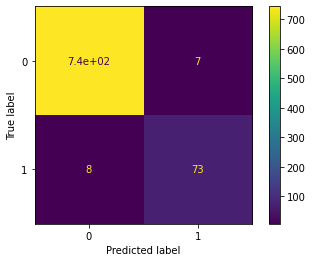


 Feature Importance :



Weight,Feature
0.1082 ± 0.0117,PrevBalanceSender
0.0776 ± 0.0029,Money Order
0.0726 ± 0.0078,PrevBalanceReceiver
0.0404 ± 0.0033,CurrentBalanceReceiver
0.0310 ± 0.0095,CurrentBalanceSender
0.0284 ± 0.0072,Cash Withdrawal
0.0276 ± 0.0133,amount
0 ± 0.0000,Debit Card
0 ± 0.0000,Cash Deposit


In [ ]:
# Decision Tree Classifier.
run_model("Decision Tree Classifier", DecisionTreeClassifier(random_state=1), train_X, train_y, val_X, val_y)

**MODEL : RANDOM FOREST CLASSIFIER**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



 Mean absolute error of Random Forest Classifier : 0.016826923076923076


 Confusion Matrix :



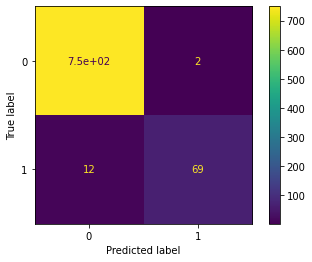


 Feature Importance :



Weight,Feature
0.1029 ± 0.0151,PrevBalanceSender
0.0635 ± 0.0051,Money Order
0.0293 ± 0.0112,CurrentBalanceSender
0.0175 ± 0.0045,CurrentBalanceReceiver
0.0065 ± 0.0025,amount
0.0053 ± 0.0054,PrevBalanceReceiver
0.0048 ± 0.0053,Cash Withdrawal
0.0002 ± 0.0018,Cash Deposit
0 ± 0.0000,Debit Card


In [ ]:
# Random Forest Classifier.
run_model("Random Forest Classifier", RandomForestClassifier(n_estimators=100, random_state=1), train_X, train_y, val_X, val_y)

**MODEL - GAUSSIAN NAIVE BAYES CLASSIFIER**


 Mean absolute error of Gaussian Naive Bayes Classifier : 0.0829326923076923


 Confusion Matrix :



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


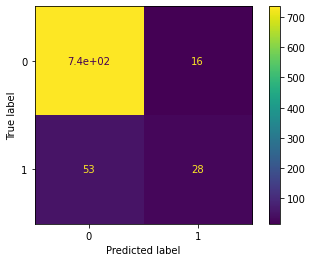


 Feature Importance :



Weight,Feature
0.0534 ± 0.0045,amount
0.0058 ± 0.0054,PrevBalanceSender
0.0055 ± 0.0033,CurrentBalanceSender
0.0026 ± 0.0024,PrevBalanceReceiver
0.0002 ± 0.0010,CurrentBalanceReceiver
0 ± 0.0000,Money Order
0 ± 0.0000,Debit Card
0 ± 0.0000,Cash Withdrawal
0 ± 0.0000,Cash Deposit


In [ ]:
# Gaussian Naive Bayes Classsifier.
run_model("Gaussian Naive Bayes Classifier", GaussianNB(), train_X, train_y, val_X, val_y)

**TESTING**

**LOAD TEST DATASET**

In [ ]:
# Load testing dataset.
test_dataset = pd.read_csv("aml_eval.csv").copy()

**PREPROCESSOR**

In [ ]:
# Preprocessor and feature engineering.
def test_preprocessor(test_dataset):

    # Drop rows with null values.
    test_dataset = test_dataset.dropna(axis = 0, how ='any')

    # Encode category coloumns with OneHotEncoding technique.
    category_coloumn = test_dataset["TransactionType"]
    category_encoded = pd.get_dummies(data = category_coloumn, drop_first = True)

    # Merge all features together.
    other_features = ["amount", "PrevBalanceSender", "CurrentBalanceSender", "PrevBalanceReceiver", "CurrentBalanceReceiver"]
    test_dataset = category_encoded.join(test_dataset[other_features])
    
    return test_dataset

test_dataset = test_preprocessor(test_dataset)
test_dataset.head()

,Cash Deposit,Cash Withdrawal,Debit Card,Money Order,amount,PrevBalanceSender,CurrentBalanceSender,PrevBalanceReceiver,CurrentBalanceReceiver
0,0,0,0,0,2976.90,0.00,0.00,0.00,0.00
1,0,1,0,0,107320.81,107320.81,0.00,289571.44,396892.25
2,0,0,0,1,84312.29,84312.29,0.00,0.00,0.00
3,1,0,0,0,153757.28,1821016.76,1974774.04,759756.00,605998.72
4,0,0,0,0,5182.58,21447.00,16264.42,0.00,0.00


**LOAD MODEL FROM DISK**

In [ ]:
# Load saved model with low mean square error from disk.
test_model_filename = "Random Forest Classifier.sav"
loaded_model = pickle.load(open(test_model_filename, 'rb'))

[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

**MAKE PREDICTIONS**

In [ ]:
# Make predictions.
result = loaded_model.predict(test_dataset)
print(result)

**WRITE PREDICTIONS TO THE TESTING DATASET**

In [ ]:
# Write predictions to the testing dataset.
eval_dataset = pd.read_csv("aml_eval.csv").copy()

# Drop rows with null values.
eval_dataset = eval_dataset.dropna(axis = 0, how ='any')

# Merge two tables.
eval_dataset = eval_dataset.join(pd.DataFrame(result, columns=["Result"]))
eval_dataset.head(10)

,TxnID,token,TransactionType,amount,SenderID,PrevBalanceSender,CurrentBalanceSender,ReceiverID,PrevBalanceReceiver,CurrentBalanceReceiver,time,Sender Location,Receiver Location,Unnamed: 13,Result
0,39136843796,14,Card,2976.90,UR16378522137,0.00,0.00,UR18616413076,0.00,0.00,17-05-2019 14:18,Boone - North Carolina,South San Francisco - California,94,0
1,2139691900,541,Cash Withdrawal,107320.81,UR36676057242,107320.81,0.00,UR17048227390,289571.44,396892.25,08-06-2019 13:16,Danville - Pennsylvania,Lumberton - Mississippi,35,0
2,20660338957,329,Money Order,84312.29,UR16574638712,84312.29,0.00,UR12154241894,0.00,0.00,30-05-2019 17:48,Danville - Pennsylvania,Lumberton - Mississippi,65,1
3,63179786910,371,Cash Deposit,153757.28,UR37893062645,1821016.76,1974774.04,UR35637447376,759756.00,605998.72,01-06-2019 11:25,Austin - Texas,Birmingham - Alabama,59,0
4,34659854003,359,Card,5182.58,UR21469012932,21447.00,16264.42,UR36765338284,0.00,0.00,31-05-2019 23:27,Port Monmouth - New Jersey,Plevna - Kansas,63,0
5,55660689827,41,Cash Withdrawal,130605.05,UR21487275297,0.00,0.00,UR18746003741,285788.50,416393.55,18-05-2019 17:57,Oscar - Oklahoma,Rockwood - Maine,88,0
6,49466936810,203,Cash Withdrawal,63594.41,UR38754897939,317140.00,253545.59,UR38914980490,0.00,63594.41,25-05-2019 11:00,Winnett - Montana,Thomson - Georgia,2,0
7,12518404759,163,Money Order,805867.58,UR26698731227,0.00,0.00,UR19445041031,1060930.38,1866797.96,23-05-2019 19:09,San Fidel - New Mexico,Corry - Pennsylvania,98,0
8,54541185549,229,Card,2871.61,UR22459974752,19015.00,16143.39,UR31862946127,0.00,0.00,26-05-2019 13:15,Bronx - New York,Southern Md Facility - Maryland,21,0
9,23800269030,229,Card,14206.83,UR37649044727,0.00,0.00,UR19642794087,0.00,0.00,26-05-2019 13:51,Acushnet - Massachusetts,Devils Tower - Wyoming,70,0
